## Objectives
    1. Data Cleaning 
    2. Removing Outliers
    3. Adding province for each location
    4. Answering business questions

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("data.csv")
df1

,job,company,location,salary,exp
0,Product Manager,VocaGame,Surabaya,IDR5.000.000 - 7.000.000,Kurang dari setahun
1,Marketing Specialist,Mitramas Infosys Global,"Tebet, Jakarta",IDR5.500.000 - 6.000.000,Kurang dari setahun
2,Java Developer,Adiwisista Finansial Teknologi,Bandung,IDR10.000.000 - 15.000.000,1 – 3 tahun
3,Brand Manager,PT. Casa Verde Indonesia (OT Group),"Cengkareng, Jakarta",IDR9.000.000 - 12.000.000,1 – 3 tahun
4,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,IDR7.000.000 - 15.000.000,1 – 3 tahun
...,...,...,...,...,...
2995,Digital Paid-Advertising Associates,Based By Basil,"Kalideres, Jakarta",IDR4.500.000 - 6.000.000,1 – 3 tahun
2996,Digital Paid-Advertising Associates,Based By Basil,"Kalideres, Jakarta",IDR4.500.000 - 6.000.000,1 – 3 tahun
2997,Digital Paid-Advertising Associates,Based By Basil,"Kalideres, Jakarta",IDR4.500.000 - 6.000.000,1 – 3 tahun
2998,IT Strategy and Data Analytics Manager,Based By Basil,"Kalideres, Jakarta",IDR4.500.000 - 6.000.000,1 – 3 tahun


## 1. Data Cleaning

In [3]:
df1.isna().sum()

job          0
company      0
location     0
salary       0
exp         58
dtype: int64

### Drop null value on exp column

In [4]:
df2 = df1.dropna(subset='exp')

In [5]:
print(df1.shape)
print(df2.shape)

(3000, 5)
(2942, 5)


In [6]:
df2[df2['exp'].isna()]

,job,company,location,salary,exp


In [7]:
df2.duplicated().sum()

219

#### Drop duplicates on all columns

In [8]:
df3 = df2.drop_duplicates()

In [9]:
print(df2.shape)
print(df3.shape)
print(df2.shape[0]-df3.shape[0])

(2942, 5)
(2723, 5)
219


#### Reformat location columns for Jakarta

In [10]:
df3['location'].unique()

array(['Surabaya', 'Tebet, Jakarta', 'Bandung', 'Cengkareng, Jakarta',
       'Jakarta', 'Grogol', 'Semarang', 'Kebon Jeruk, Jakarta', 'Bekasi',
       'Kelapa Gading, Jakarta', 'Kebayoran Baru, Jakarta', 'Tangerang',
       'Yogyakarta', 'Setiabudi, Jakarta', 'Kebayoran Lama, Jakarta',
       'Tambora, Jakarta', 'Sawah Besar, Jakarta', 'Penjaringan, Jakarta',
       'Menteng, Jakarta', 'Sunter, Jakarta', 'Gambir, Jakarta',
       'Cakung, Jakarta', 'Grogol Petamburan, Jakarta', 'Cikarang',
       'South Tangerang', 'Kembangan, Jakarta', 'Depok',
       'Cilandak, Jakarta', 'Kemayoran, Jakarta', 'Senayan, Jakarta',
       'Pulo Gadung, Jakarta', 'Kuningan, Jakarta', 'Bogor', 'Denpasar',
       'Tanah Abang, Jakarta', 'Mampang Prapatan, Jakarta', 'Ambon',
       'Batam', 'Kemang', 'Blok M, Jakarta', 'Palmerah, Jakarta', 'Jawa',
       'Tanjung Priok, Jakarta', 'Taman Sari, Jakarta', 'Serpong',
       'Cipayung, Jakarta', 'Solo', 'Driyorejo', 'Madiun', 'Medan',
       'Seminyak town', 'P

In [11]:
df3[df3['location'].str.contains('jakarta',case=False,regex=False)]

,job,company,location,salary,exp
1,Marketing Specialist,Mitramas Infosys Global,"Tebet, Jakarta",IDR5.500.000 - 6.000.000,Kurang dari setahun
3,Brand Manager,PT. Casa Verde Indonesia (OT Group),"Cengkareng, Jakarta",IDR9.000.000 - 12.000.000,1 – 3 tahun
4,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,IDR7.000.000 - 15.000.000,1 – 3 tahun
5,3D Artist (Texture Modeller Generalist) or 3D ...,Xii Braves / Century Game,Jakarta,IDR8.000.000 - 16.000.000,3 – 5 tahun
8,Front-End Developer,Lingotalk,Jakarta,IDR500.000,Kurang dari setahun
...,...,...,...,...,...
2989,Platform and Infrastructure Engineer - SDE1,Lummo (formerly BukuKas),Jakarta,IDR12.000.000 - 20.000.000,1 – 3 tahun
2990,Junior Full Stack Developer,Lummo (formerly BukuKas),Jakarta,IDR12.000.000 - 20.000.000,1 – 3 tahun
2991,Supervisor House keeping,PT. Gedung Bank Exim,Jakarta,Company prefers not to disclose,1 – 3 tahun
2994,Digital Paid-Advertising Associates,Based By Basil,"Kalideres, Jakarta",IDR4.500.000 - 6.000.000,1 – 3 tahun


In [12]:
df4 = df3.copy()

In [13]:
df4['location'] = df4['location'].apply(lambda x: 'Jakarta' if 'jakarta' in x.lower() else x) 

#### Ensure Jakarta location

In [14]:
df4['location'].unique()

array(['Surabaya', 'Jakarta', 'Bandung', 'Grogol', 'Semarang', 'Bekasi',
       'Tangerang', 'Yogyakarta', 'Cikarang', 'South Tangerang', 'Depok',
       'Bogor', 'Denpasar', 'Ambon', 'Batam', 'Kemang', 'Jawa', 'Serpong',
       'Solo', 'Driyorejo', 'Madiun', 'Medan', 'Seminyak town', 'Badung',
       'Banjarmasin', 'Sragen', 'Bandar Lampung', 'Martapura',
       'Balikpapan', 'Ubud', 'Palembang', 'Sidoarjo', 'Mojokerto',
       'Bungku', 'Pelaihari', 'Pekanbaru', 'Dumai', 'Malang', 'Kediri',
       'Kuningan', 'Senayan', 'Pontianak', 'Bojonegoro', 'Tanjungpinang',
       'Bontang', 'Cirebon', 'Palopo', 'Karanganyar', 'Serang', 'Tegal',
       'Sleman', 'Karawang', 'Sidoaji', 'Salatiga', 'Cibitung',
       'Makassar', 'Kembangan', 'Purwokerto', 'Solok', 'Lamongan',
       'Garut', 'Gianyar', 'Abang', 'Pematangsiantar', 'Magelang',
       'Demak', 'Sumedang', 'Sukoharjo', 'Sidenreng', 'Samarinda', 'Tual',
       'Tabanan', 'Tuban', 'Nabire', 'Padang', 'Pare', 'Sinjai', 'Palu',
       'B

#### There are location in Jakarta, let's convert it

In [15]:
df4[df4['location'].isin(['Grogol','Kemang','Senayan','Cilandak'])]

,job,company,location,salary,exp
6,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Grogol,IDR3.500.000 - 4.000.000,1 – 3 tahun
157,Technical Writer,Terralogiq,Kemang,IDR5.000.000 - 6.000.000,1 – 3 tahun
1035,Revenue Operations Manager,Perqara,Senayan,IDR10.000.000 - 14.000.000,3 – 5 tahun
1674,Search Engine Optimization (SEO) Specialist,Ydigital Asia,Kemang,IDR5.000.000 - 7.000.000,1 – 3 tahun
1866,KOL & Campaign Specialist,Pops Worldwide Indonesia,Senayan,IDR7.000.000 - 10.000.000,Kurang dari setahun
1912,Digital Marketing (PPC) Specialist,Ydigital Asia,Kemang,IDR3.000.000 - 7.000.000,1 – 3 tahun
1913,Jr. Mobile Developer,Ydigital Asia,Kemang,IDR3.000.000 - 7.000.000,1 – 3 tahun
2557,Node Js Developer (Chat),PT Linxchat Global Indonesia,Grogol,IDR7.000.000 - 12.000.000,1 – 3 tahun
2808,Back End Developer,PT Multi Bit Group Asia,Cilandak,Company prefers not to disclose,1 – 3 tahun
2809,Front End Developer,PT Multi Bit Group Asia,Cilandak,Company prefers not to disclose,1 – 3 tahun


In [16]:
idx_3_jkt = df4[df4['location'].isin(['Grogol','Kemang','Senayan','Cilandak'])].index

#### Replace those values to Jakarta

In [17]:
df4['location'].replace(['Grogol','Kemang','Senayan','Cilandak'], 'Jakarta', inplace=True)

In [18]:
# check the data
df4.loc[idx_3_jkt]

,job,company,location,salary,exp
6,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Jakarta,IDR3.500.000 - 4.000.000,1 – 3 tahun
157,Technical Writer,Terralogiq,Jakarta,IDR5.000.000 - 6.000.000,1 – 3 tahun
1035,Revenue Operations Manager,Perqara,Jakarta,IDR10.000.000 - 14.000.000,3 – 5 tahun
1674,Search Engine Optimization (SEO) Specialist,Ydigital Asia,Jakarta,IDR5.000.000 - 7.000.000,1 – 3 tahun
1866,KOL & Campaign Specialist,Pops Worldwide Indonesia,Jakarta,IDR7.000.000 - 10.000.000,Kurang dari setahun
1912,Digital Marketing (PPC) Specialist,Ydigital Asia,Jakarta,IDR3.000.000 - 7.000.000,1 – 3 tahun
1913,Jr. Mobile Developer,Ydigital Asia,Jakarta,IDR3.000.000 - 7.000.000,1 – 3 tahun
2557,Node Js Developer (Chat),PT Linxchat Global Indonesia,Jakarta,IDR7.000.000 - 12.000.000,1 – 3 tahun
2808,Back End Developer,PT Multi Bit Group Asia,Jakarta,Company prefers not to disclose,1 – 3 tahun
2809,Front End Developer,PT Multi Bit Group Asia,Jakarta,Company prefers not to disclose,1 – 3 tahun


### Reformat salary column

In [19]:
df4[~df4['salary'].str.contains('IDR',regex=False)]['salary'].unique()

array(['Company prefers not to disclose',
       'Login to view estimated salary by Glints.', 'MYR5.000 - 10.000',
       'SGD420 - 1.000', 'USD2.000 - 3.300', 'SGD300 - 600',
       'MYR5.000 - 8.000', 'USD500 - 700', 'SGD1.000', 'MYR5.000 - 7.000',
       'MYR3.500 - 5.000', 'USD4.000 - 5.000', 'USD1.000 - 1.500',
       'SGD1.000 - 2.500'], dtype=object)

#### Check salary value where not containing IDR

In [20]:
df4[~df4['salary'].str.contains('IDR',regex=False)]

,job,company,location,salary,exp
9,Graphic Designer for Retail,JVS Group Indonesia,Jakarta,Company prefers not to disclose,1 – 3 tahun
11,Business Developer Executive,SwipeRx,Jakarta,Company prefers not to disclose,1 – 3 tahun
12,Account Manager,Yoona Digital Indonesia,Jakarta,Company prefers not to disclose,1 – 3 tahun
14,Graphic Design Manager,CarbonEthics,Bekasi,Company prefers not to disclose,3 – 5 tahun
15,Project Manager,Pt. Trawlbens Teknologi Anak Indonesia,Jakarta,Company prefers not to disclose,3 – 5 tahun
...,...,...,...,...,...
2926,Associate Partnership Manager (Indonesia),Staffany Private Limited,Jakarta,SGD1.000 - 2.500,3 – 5 tahun
2966,IT Security Penetration Tester,PT. Mitra Solutech Utama,Jakarta,Company prefers not to disclose,1 – 3 tahun
2973,Photographer dan Videographer,Promedika Mitra Utama,Samarinda,Company prefers not to disclose,1 – 3 tahun
2974,HR Manager,Promedika Mitra Utama,Samarinda,Company prefers not to disclose,1 – 3 tahun


#### Drop non numeric values on salary column

In [21]:
df4[df4['salary'].isin(['Company prefers not to disclose','Login to view estimated salary by Glints.'])]

,job,company,location,salary,exp
9,Graphic Designer for Retail,JVS Group Indonesia,Jakarta,Company prefers not to disclose,1 – 3 tahun
11,Business Developer Executive,SwipeRx,Jakarta,Company prefers not to disclose,1 – 3 tahun
12,Account Manager,Yoona Digital Indonesia,Jakarta,Company prefers not to disclose,1 – 3 tahun
14,Graphic Design Manager,CarbonEthics,Bekasi,Company prefers not to disclose,3 – 5 tahun
15,Project Manager,Pt. Trawlbens Teknologi Anak Indonesia,Jakarta,Company prefers not to disclose,3 – 5 tahun
...,...,...,...,...,...
2924,Openshift,Arbeit Consultancy,Jakarta,Company prefers not to disclose,1 – 3 tahun
2966,IT Security Penetration Tester,PT. Mitra Solutech Utama,Jakarta,Company prefers not to disclose,1 – 3 tahun
2973,Photographer dan Videographer,Promedika Mitra Utama,Samarinda,Company prefers not to disclose,1 – 3 tahun
2974,HR Manager,Promedika Mitra Utama,Samarinda,Company prefers not to disclose,1 – 3 tahun


In [22]:
df5 = df4[~df4['salary'].isin(['Company prefers not to disclose','Login to view estimated salary by Glints.'])]

In [23]:
df5

,job,company,location,salary,exp
0,Product Manager,VocaGame,Surabaya,IDR5.000.000 - 7.000.000,Kurang dari setahun
1,Marketing Specialist,Mitramas Infosys Global,Jakarta,IDR5.500.000 - 6.000.000,Kurang dari setahun
2,Java Developer,Adiwisista Finansial Teknologi,Bandung,IDR10.000.000 - 15.000.000,1 – 3 tahun
3,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,IDR9.000.000 - 12.000.000,1 – 3 tahun
4,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,IDR7.000.000 - 15.000.000,1 – 3 tahun
...,...,...,...,...,...
2992,PERSONAL ASISTEN,Royal D'paragon Land,Yogyakarta,IDR3.500.000 - 4.000.000,1 – 3 tahun
2993,SOCIAL MEDIA PROMOTOR,Pt Bisnis Mapan Sejahtera,Sidoarjo,IDR2.500.000 - 3.500.000,Kurang dari setahun
2994,Digital Paid-Advertising Associates,Based By Basil,Jakarta,IDR4.500.000 - 6.000.000,1 – 3 tahun
2998,IT Strategy and Data Analytics Manager,Based By Basil,Jakarta,IDR4.500.000 - 6.000.000,1 – 3 tahun


#### Create new columns: salary_lower_threshold and salary_upper_threshold

In [24]:
df6 = df5.copy()

In [25]:
df6['currency'] = df6['salary'].apply(lambda x: x[:3])

In [26]:
df6['salary_lower_threshold'] = df6['salary'].apply(lambda x: int(x.split(' - ')[0][3:].strip().replace('.','')))

In [27]:
df6['salary_upper_threshold'] = df6['salary'].apply(lambda x: int(x.split(' - ')[1].strip().replace('.','')) if len(x.split(' - '))>1 else int(x.split(' - ')[0][3:].strip().replace('.','')))

In [28]:
df6

,job,company,location,salary,exp,currency,salary_lower_threshold,salary_upper_threshold
0,Product Manager,VocaGame,Surabaya,IDR5.000.000 - 7.000.000,Kurang dari setahun,IDR,5000000,7000000
1,Marketing Specialist,Mitramas Infosys Global,Jakarta,IDR5.500.000 - 6.000.000,Kurang dari setahun,IDR,5500000,6000000
2,Java Developer,Adiwisista Finansial Teknologi,Bandung,IDR10.000.000 - 15.000.000,1 – 3 tahun,IDR,10000000,15000000
3,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,IDR9.000.000 - 12.000.000,1 – 3 tahun,IDR,9000000,12000000
4,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,IDR7.000.000 - 15.000.000,1 – 3 tahun,IDR,7000000,15000000
...,...,...,...,...,...,...,...,...
2992,PERSONAL ASISTEN,Royal D'paragon Land,Yogyakarta,IDR3.500.000 - 4.000.000,1 – 3 tahun,IDR,3500000,4000000
2993,SOCIAL MEDIA PROMOTOR,Pt Bisnis Mapan Sejahtera,Sidoarjo,IDR2.500.000 - 3.500.000,Kurang dari setahun,IDR,2500000,3500000
2994,Digital Paid-Advertising Associates,Based By Basil,Jakarta,IDR4.500.000 - 6.000.000,1 – 3 tahun,IDR,4500000,6000000
2998,IT Strategy and Data Analytics Manager,Based By Basil,Jakarta,IDR4.500.000 - 6.000.000,1 – 3 tahun,IDR,4500000,6000000


#### Drop salary column

In [29]:
df6.drop('salary',axis=1,inplace=True)

#### Convert currency to IDR

In [30]:
df6[df6['currency']!='IDR']

,job,company,location,exp,currency,salary_lower_threshold,salary_upper_threshold
239,Data Warehouse Engineer(Teradata),PT. Mitra Solutech Utama,Jakarta,3 – 5 tahun,MYR,5000,10000
846,IT Helpdesk Specialist,eVantage Technology Pte Ltd,Batam,1 – 3 tahun,SGD,420,1000
847,Exim Staff,eVantage Technology Pte Ltd,Batam,1 – 3 tahun,SGD,420,1000
1091,Ruby on Rails Developer,Jitera,Jakarta,3 – 5 tahun,USD,2000,3300
1092,Ruby on Rails Developer,Jitera,Bandung,3 – 5 tahun,USD,2000,3300
1132,Community Partnerships Executive,Y Ventures Group PTE LTD,Jakarta,Kurang dari setahun,SGD,300,600
1277,Security Administrator,eVantage Technology Pte Ltd,Batam,1 – 3 tahun,SGD,420,1000
1460,SAS Adminitsrator 9x3 or 9x4,PT. Mitra Solutech Utama,Jakarta,3 – 5 tahun,MYR,5000,8000
1461,QA Tester,PT. Mitra Solutech Utama,Jakarta,3 – 5 tahun,MYR,5000,8000
1462,Java Backend Developer,PT. Mitra Solutech Utama,Jakarta,3 – 5 tahun,MYR,5000,8000


In [31]:
df6['currency'].unique()

array(['IDR', 'MYR', 'SGD', 'USD'], dtype=object)

#### Set value for each currency according to IDR

In [32]:
myr_to_idr = 3306.76
sgd_to_idr = 10695.69
usd_to_idr = 15361.30

In [33]:
import numpy as np

df6['salary_lower_idr'] = np.where(df6['currency'] == 'MYR', df6['salary_lower_threshold'] * myr_to_idr,
                        np.where(df6['currency'] == 'SGD', df6['salary_lower_threshold'] * sgd_to_idr,
                        np.where(df6['currency'] == 'USD', df6['salary_lower_threshold'] * usd_to_idr, 
                        df6['salary_lower_threshold'])))

df6['salary_upper_idr'] = np.where(df6['currency'] == 'MYR', df6['salary_upper_threshold'] * myr_to_idr,
                        np.where(df6['currency'] == 'SGD', df6['salary_upper_threshold'] * sgd_to_idr,
                        np.where(df6['currency'] == 'USD', df6['salary_upper_threshold'] * usd_to_idr, 
                        df6['salary_upper_threshold'])))

In [34]:
df6[df6['currency']!='IDR'].head()

,job,company,location,exp,currency,salary_lower_threshold,salary_upper_threshold,salary_lower_idr,salary_upper_idr
239,Data Warehouse Engineer(Teradata),PT. Mitra Solutech Utama,Jakarta,3 – 5 tahun,MYR,5000,10000,16533800.0,33067600.0
846,IT Helpdesk Specialist,eVantage Technology Pte Ltd,Batam,1 – 3 tahun,SGD,420,1000,4492189.8,10695690.0
847,Exim Staff,eVantage Technology Pte Ltd,Batam,1 – 3 tahun,SGD,420,1000,4492189.8,10695690.0
1091,Ruby on Rails Developer,Jitera,Jakarta,3 – 5 tahun,USD,2000,3300,30722600.0,50692290.0
1092,Ruby on Rails Developer,Jitera,Bandung,3 – 5 tahun,USD,2000,3300,30722600.0,50692290.0


#### Round up salary_lower_idr and salary_upper_idr columns, then convert to int

In [35]:
df6['salary_lower_idr'] = df6['salary_lower_idr'].apply(np.ceil).astype(int)
df6['salary_upper_idr'] = df6['salary_upper_idr'].apply(np.ceil).astype(int)

In [36]:
df7 = df6.copy()

In [37]:
df7.drop(columns=['currency','salary_lower_threshold','salary_upper_threshold'],inplace=True)
df7.rename(columns={'salary_lower_idr':'salary_lower_threshold','salary_upper_idr':'salary_upper_threshold'},inplace=True)

In [38]:
df7

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold
0,Product Manager,VocaGame,Surabaya,Kurang dari setahun,5000000,7000000
1,Marketing Specialist,Mitramas Infosys Global,Jakarta,Kurang dari setahun,5500000,6000000
2,Java Developer,Adiwisista Finansial Teknologi,Bandung,1 – 3 tahun,10000000,15000000
3,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,1 – 3 tahun,9000000,12000000
4,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,1 – 3 tahun,7000000,15000000
...,...,...,...,...,...,...
2992,PERSONAL ASISTEN,Royal D'paragon Land,Yogyakarta,1 – 3 tahun,3500000,4000000
2993,SOCIAL MEDIA PROMOTOR,Pt Bisnis Mapan Sejahtera,Sidoarjo,Kurang dari setahun,2500000,3500000
2994,Digital Paid-Advertising Associates,Based By Basil,Jakarta,1 – 3 tahun,4500000,6000000
2998,IT Strategy and Data Analytics Manager,Based By Basil,Jakarta,1 – 3 tahun,4500000,6000000


## 2. Removing Outliers

### Remove outliers with z-scores

In [39]:
df7.describe().reset_index()

,index,salary_lower_threshold,salary_upper_threshold
0,count,2.312000e+03,2.312000e+03
1,mean,5.828636e+06,9.558122e+06
2,std,5.309994e+06,1.115334e+07
3,min,1.000000e+02,2.000000e+02
4,25%,3.500000e+06,5.000000e+06
5,50%,4.650000e+06,6.900000e+06
6,75%,7.000000e+06,1.025000e+07
7,max,8.800000e+07,2.500000e+08


In [40]:
df7['salary_median'] = (df7['salary_lower_threshold'] + df7['salary_upper_threshold'])/2

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)

In [42]:
df7['exp'].value_counts()

1 – 3 tahun            1200
Kurang dari setahun     667
3 – 5 tahun             345
5 – 10 tahun             90
Lebih dari 10 tahun      10
Name: exp, dtype: int64

<AxesSubplot:xlabel='exp', ylabel='count'>

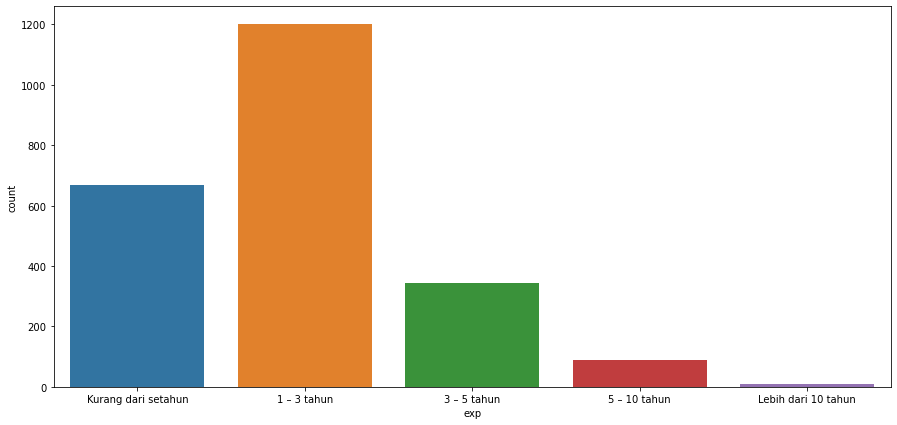

In [43]:
sns.countplot(data=df7, x="exp")

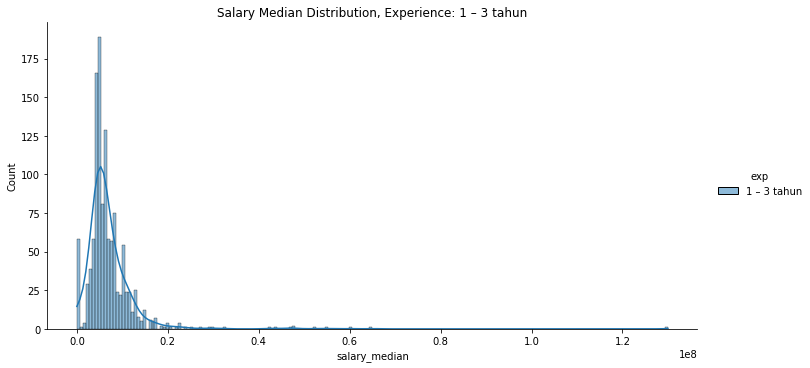

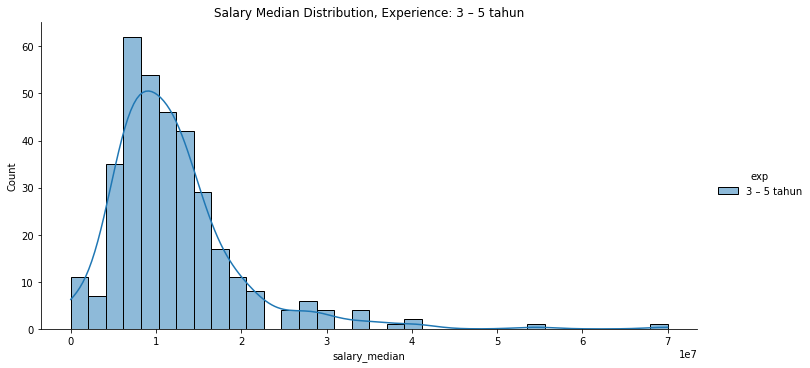

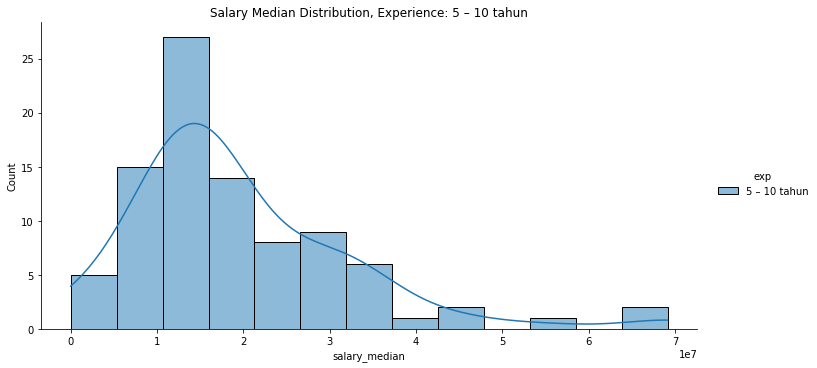

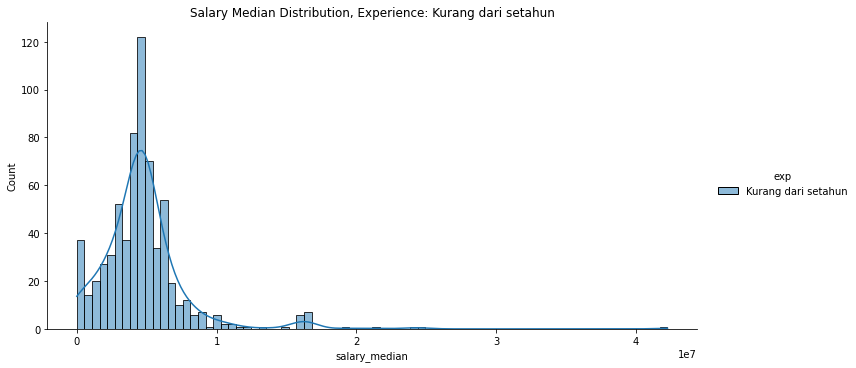

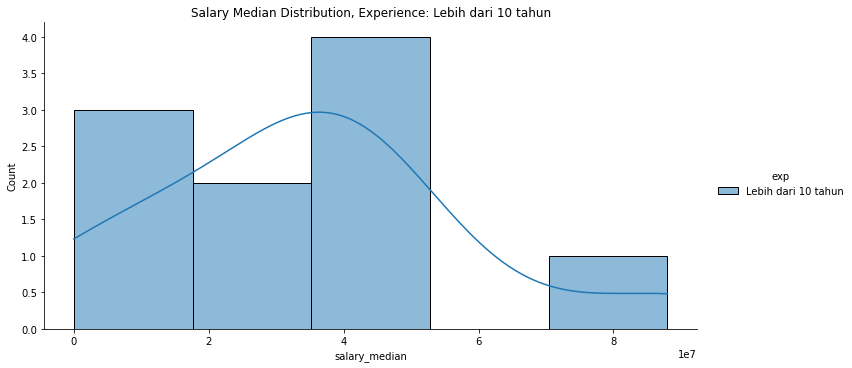

In [44]:
for key, subdf in df7.groupby('exp'):
    sns.displot(data=subdf, x='salary_median', hue='exp', height=5, aspect=2, kde=True)
    plt.title(f'Salary Median Distribution, Experience: {key}')
plt.show()

In [45]:
from scipy import stats

In [46]:
def remove_outliers_zscore(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('exp'):
        subdf['z_scores'] = abs(stats.zscore(subdf['salary_median']))
        reduced_df = subdf[subdf['z_scores']<3]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df8 = remove_outliers_zscore(df7)

In [48]:
print(df7.shape[0])
print(df8.shape[0])
print(df7.shape[0] - df8.shape[0])

2312
2272
40


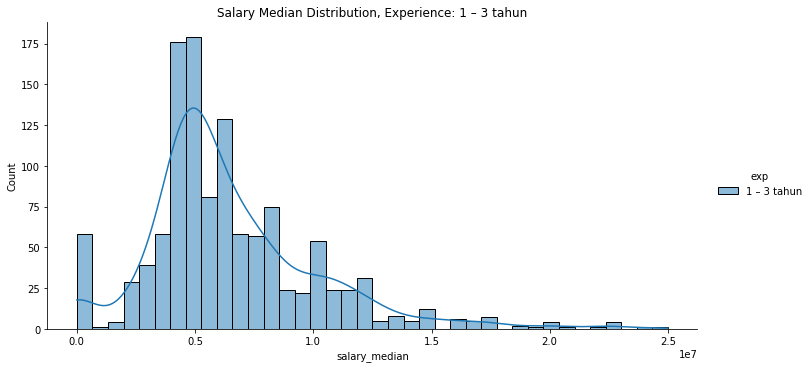

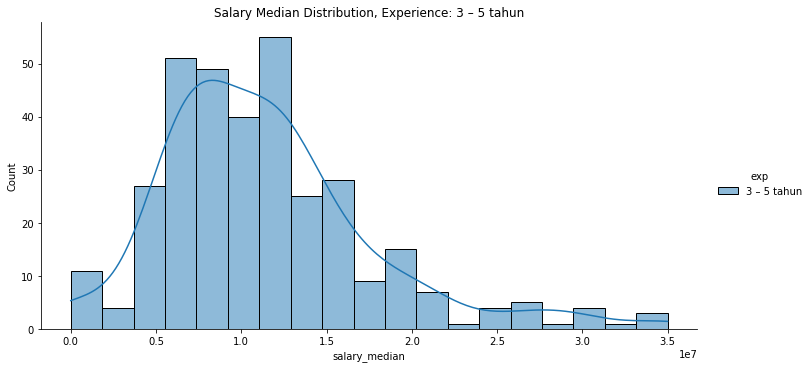

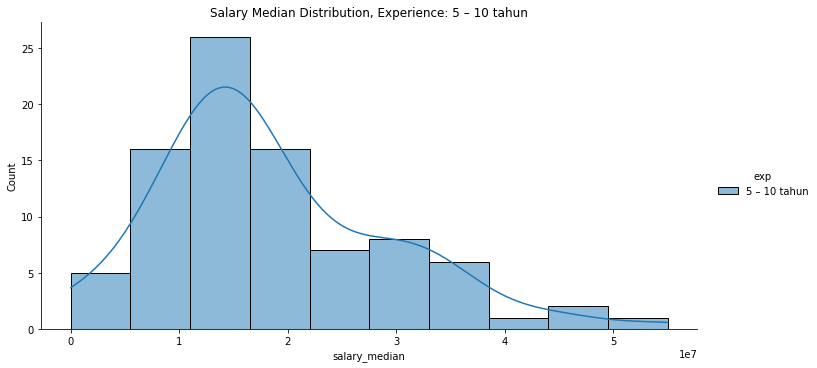

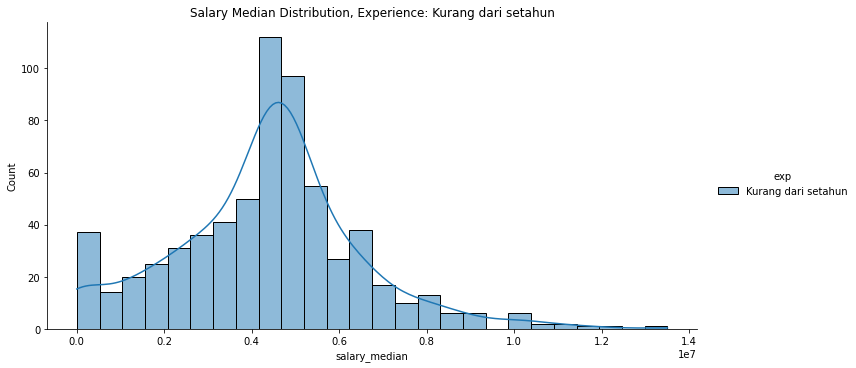

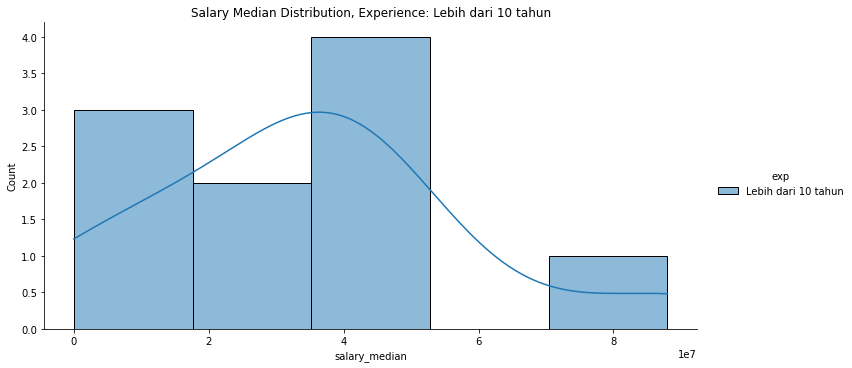

In [49]:
for key, subdf in df8.groupby('exp'):
    sns.displot(data=subdf, x='salary_median', hue='exp', height=5, aspect=2, kde=True)
    plt.title(f'Salary Median Distribution, Experience: {key}')
plt.show()

In [50]:
df8

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold,salary_median,z_scores
0,Java Developer,Adiwisista Finansial Teknologi,Bandung,1 – 3 tahun,10000000,15000000,12500000.0,0.841209
1,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,1 – 3 tahun,9000000,12000000,10500000.0,0.535623
2,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,1 – 3 tahun,7000000,15000000,11000000.0,0.612019
3,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Jakarta,1 – 3 tahun,3500000,4000000,3750000.0,0.495732
4,Back End Developer,Bali United Football Club,Jakarta,1 – 3 tahun,100,200,150.0,1.068684
...,...,...,...,...,...,...,...,...
2267,Pre-Sales Solutions Architect Lead,Great Fortune Indonesia,Jakarta,Lebih dari 10 tahun,40000000,40000100,40000050.0,0.227848
2268,Pentester Support,Arbeit Consultancy,Jakarta,Lebih dari 10 tahun,100,200,150.0,1.524816
2269,GA and Purchasing Manager,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0,0.977114
2270,Junior Developer,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0,0.977114


In [51]:
for exp, subdf in df8.groupby('exp'):
    Q1 = subdf['salary_median'].quantile(0.25)
    Q3 = subdf['salary_median'].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(exp)
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'lower range: {lower_range}')
    print(f'upper range: {upper_range}\n')

1 – 3 tahun
Q1: 4500000.0
Q3: 8000000.0
lower range: -750000.0
upper range: 13250000.0

3 – 5 tahun
Q1: 7250000.0
Q3: 14000012.5
lower range: -2875018.75
upper range: 24125031.25

5 – 10 tahun
Q1: 12375000.0
Q3: 25000000.0
lower range: -6562500.0
upper range: 43937500.0

Kurang dari setahun
Q1: 3000387.5
Q3: 5250000.0
lower range: -374031.25
upper range: 8624418.75

Lebih dari 10 tahun
Q1: 18125000.0
Q3: 41875012.5
lower range: -17500018.75
upper range: 77500031.25



In [52]:
df8.drop('z_scores',axis=1,inplace=True)

#### In my knowledge, salary_median below IDR 50000 is a anomaly, let's drop them

In [53]:
df9 = df8[~(df8['salary_median']<=50000)]
df9

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold,salary_median
0,Java Developer,Adiwisista Finansial Teknologi,Bandung,1 – 3 tahun,10000000,15000000,12500000.0
1,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,1 – 3 tahun,9000000,12000000,10500000.0
2,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,1 – 3 tahun,7000000,15000000,11000000.0
3,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Jakarta,1 – 3 tahun,3500000,4000000,3750000.0
6,Staff Admin (Data Entry),PT Indonesia Insurance Brokers,Jakarta,1 – 3 tahun,4000000,6000000,5000000.0
...,...,...,...,...,...,...,...
2266,Senior IT Project Manager,PT. Reeracoen Indonesia,Tangerang,Lebih dari 10 tahun,35000000,45000000,40000000.0
2267,Pre-Sales Solutions Architect Lead,Great Fortune Indonesia,Jakarta,Lebih dari 10 tahun,40000000,40000100,40000050.0
2269,GA and Purchasing Manager,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0
2270,Junior Developer,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0


## 3. Add province column for each location

Indonesian Cities Database: https://simplemaps.com/data/id-cities

In [54]:
cities_df = pd.read_csv('cities.csv')
cities_df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Jakarta,-6.2146,106.8451,Indonesia,ID,Jakarta,primary,34540000.0,10154134.0
1,Surabaya,-7.2458,112.7378,Indonesia,ID,Jawa Timur,admin,4975000.0,4975000.0
2,Bandung,-6.9500,107.5667,Indonesia,ID,Jawa Barat,admin,2394873.0,2394873.0
3,Bekasi,-6.2333,107.0000,Indonesia,ID,Jawa Barat,NaN,2381053.0,2381053.0
4,Tangerang,-6.1783,106.6319,Indonesia,ID,Jawa Barat,NaN,2237006.0,2237006.0
...,...,...,...,...,...,...,...,...,...
8890,Barapas,-2.1990,137.0013,Indonesia,ID,Papua,minor,NaN,NaN
8891,Burmeso,-2.3261,138.0414,Indonesia,ID,Papua,minor,NaN,NaN
8892,Trimuris,-1.9582,137.8366,Indonesia,ID,Papua,minor,NaN,NaN
8893,Kasonawejo,-2.2818,138.0348,Indonesia,ID,Papua,minor,NaN,NaN


In [55]:
dup = cities_df[cities_df.duplicated('city',keep=False)].sort_values('city')
dup

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
2445,Ajung,-8.1335,113.8207,Indonesia,ID,Jawa Timur,minor,NaN,NaN
2446,Ajung,-8.2059,113.6560,Indonesia,ID,Jawa Timur,minor,NaN,NaN
3044,Ancol,-7.4599,107.9856,Indonesia,ID,Jawa Barat,minor,NaN,NaN
3045,Ancol,-7.3651,108.3871,Indonesia,ID,Jawa Barat,minor,NaN,NaN
2521,Andongsari,-8.1697,113.5505,Indonesia,ID,Jawa Timur,minor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2910,Wonosari,-8.0056,112.3532,Indonesia,ID,Jawa Timur,minor,NaN,NaN
5994,Wonosari,-6.9516,111.4335,Indonesia,ID,Jawa Tengah,minor,NaN,NaN
5419,Wonosari,-7.9656,110.6036,Indonesia,ID,Yogyakarta,minor,NaN,NaN
6877,Wotan,-8.3849,123.1634,Indonesia,ID,Nusa Tenggara Timur,minor,NaN,NaN


#### remove capital duplicated city

In [56]:
cap_city = dup[dup['capital']=='admin']['city']
cap_city

2      Bandung
22    Jayapura
17      Serang
1     Surabaya
Name: city, dtype: object

In [57]:
dup_idx_1 = dup[(dup['city'].isin(cap_city)) & (dup['capital']!='admin')].index
dup.drop(dup_idx_1, inplace=True)

#### remove duplicated on ['city','country', 'iso2', 'capital', 'population', 'population_proper']

In [58]:
dup_idx_2 = dup[dup.duplicated(subset=['city','country', 'iso2', 'capital', 'population', 'population_proper'])].index
dup.drop(dup_idx_2, inplace=True)

#### remove duplicated on city and population nan

In [59]:
dup_idx_3 = dup[(dup.duplicated('city',keep=False)) & ((dup['population'].isna()) | (dup['population_proper'].isna()))].index
dup.drop(dup_idx_3, inplace=True)

In [60]:
dup

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
2445,Ajung,-8.1335,113.8207,Indonesia,ID,Jawa Timur,minor,NaN,NaN
3044,Ancol,-7.4599,107.9856,Indonesia,ID,Jawa Barat,minor,NaN,NaN
2521,Andongsari,-8.1697,113.5505,Indonesia,ID,Jawa Timur,minor,NaN,NaN
5075,Ares Tengah,-6.8905,113.7790,Indonesia,ID,Jawa Timur,minor,NaN,NaN
5151,Arjasa,-6.8596,115.2852,Indonesia,ID,Jawa Timur,minor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3649,Wonodadi,-8.1593,111.4550,Indonesia,ID,Jawa Timur,minor,NaN,NaN
484,Wonokerto,-6.9685,112.3975,Indonesia,ID,Jawa Timur,minor,NaN,NaN
79,Wonorejo,-7.3114,112.7968,Indonesia,ID,Jawa Timur,minor,NaN,NaN
3778,Wonosari,-7.0722,111.7116,Indonesia,ID,Jawa Timur,minor,NaN,NaN


In [61]:
print(dup_idx_1.shape[0])
print(dup_idx_2.shape[0])
print(dup_idx_3.shape[0])

7
1243
3


In [62]:
dropped_idx = list(dup_idx_1) + list(dup_idx_2) + list(dup_idx_3)
len(dropped_idx)

1253

In [63]:
cities_df.drop(dropped_idx, inplace=True)

In [64]:
df9

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold,salary_median
0,Java Developer,Adiwisista Finansial Teknologi,Bandung,1 – 3 tahun,10000000,15000000,12500000.0
1,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,1 – 3 tahun,9000000,12000000,10500000.0
2,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,1 – 3 tahun,7000000,15000000,11000000.0
3,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Jakarta,1 – 3 tahun,3500000,4000000,3750000.0
6,Staff Admin (Data Entry),PT Indonesia Insurance Brokers,Jakarta,1 – 3 tahun,4000000,6000000,5000000.0
...,...,...,...,...,...,...,...
2266,Senior IT Project Manager,PT. Reeracoen Indonesia,Tangerang,Lebih dari 10 tahun,35000000,45000000,40000000.0
2267,Pre-Sales Solutions Architect Lead,Great Fortune Indonesia,Jakarta,Lebih dari 10 tahun,40000000,40000100,40000050.0
2269,GA and Purchasing Manager,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0
2270,Junior Developer,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0


In [65]:
df10 = df9.merge(cities_df, how='left', left_on='location', right_on='city')
df10.drop(columns=['country','iso2'], inplace=True)

In [66]:
df10

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold,salary_median,city,lat,lng,admin_name,capital,population,population_proper
0,Java Developer,Adiwisista Finansial Teknologi,Bandung,1 – 3 tahun,10000000,15000000,12500000.0,Bandung,-6.9500,107.5667,Jawa Barat,admin,2394873.0,2394873.0
1,Brand Manager,PT. Casa Verde Indonesia (OT Group),Jakarta,1 – 3 tahun,9000000,12000000,10500000.0,Jakarta,-6.2146,106.8451,Jakarta,primary,34540000.0,10154134.0
2,Product Engineer (Mobile - Flutter),Zero One Group,Jakarta,1 – 3 tahun,7000000,15000000,11000000.0,Jakarta,-6.2146,106.8451,Jakarta,primary,34540000.0,10154134.0
3,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,Jakarta,1 – 3 tahun,3500000,4000000,3750000.0,Jakarta,-6.2146,106.8451,Jakarta,primary,34540000.0,10154134.0
4,Staff Admin (Data Entry),PT Indonesia Insurance Brokers,Jakarta,1 – 3 tahun,4000000,6000000,5000000.0,Jakarta,-6.2146,106.8451,Jakarta,primary,34540000.0,10154134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,Senior IT Project Manager,PT. Reeracoen Indonesia,Tangerang,Lebih dari 10 tahun,35000000,45000000,40000000.0,Tangerang,-6.1783,106.6319,Jawa Barat,NaN,2237006.0,2237006.0
2161,Pre-Sales Solutions Architect Lead,Great Fortune Indonesia,Jakarta,Lebih dari 10 tahun,40000000,40000100,40000050.0,Jakarta,-6.2146,106.8451,Jakarta,primary,34540000.0,10154134.0
2162,GA and Purchasing Manager,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0,Bandung,-6.9500,107.5667,Jawa Barat,admin,2394873.0,2394873.0
2163,Junior Developer,Pt. Cemerlang Multimedia,Bandung,Lebih dari 10 tahun,10000000,15000000,12500000.0,Bandung,-6.9500,107.5667,Jawa Barat,admin,2394873.0,2394873.0


In [67]:
print(sorted(cities_df['admin_name'].unique()))

['Aceh', 'Bali', 'Banten', 'Bengkulu', 'Gorontalo', 'Jakarta', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta']


In [68]:
df10[df10['city'].isna()]['location'].unique()

array(['Batam', 'Seminyak town', 'Ubud', 'Serpong', 'Badung', 'Malang',
       'Bontang', 'Cirebon', 'South Tangerang', 'Madiun', 'Solok',
       'Pematangsiantar', 'Driyorejo', 'Magelang', 'Sumedang', 'Salatiga',
       'Balikpapan', 'Ternate', 'Solo', 'Dumai', 'Tual', 'Pelaihari',
       'Palopo'], dtype=object)

In [69]:
dic = {
    'Bali':['Seminyak town','Ubud','Badung'],
    'Jawa Barat':['Cirebon','Sumedang'],
    'Kepulauan Riau':['Batam'],
    'Banten':['Serpong','South Tangerang'],
    'Jawa Timur':['Malang','Madiun','Driyorejo'],
    'Jawa Tengah':['Magelang','Salatiga','Solo'],
    'Kalimantan Timur':['Bontang','Balikpapan'],
    'Sumatera Barat':['Solok'],
    'Sumatera Utara':['Pematangsiantar'],
    'Riau':['Dumai'],
    'Maluku Utara':['Ternate'],
    'Maluku':['Tual'],
    'Kalimantan Selatan':['Pelaihari'],
    'Sulawesi Selatan':['Palopo']
}

In [70]:
df10[df10['city'].isna()].head()

,job,company,location,exp,salary_lower_threshold,salary_upper_threshold,salary_median,city,lat,lng,admin_name,capital,population,population_proper
57,Marketing Staf,Laboratorium Klinik Westerindo,Batam,1 – 3 tahun,4000000,4000000,4000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Project Secretary,Pt Studio Artalenta Indonesia,Seminyak town,1 – 3 tahun,5000000,8000000,6500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Fullstack Developer,Pt Studio Artalenta Indonesia,Seminyak town,1 – 3 tahun,5000000,8000000,6500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Application Analyst,Pt Studio Artalenta Indonesia,Seminyak town,1 – 3 tahun,5000000,8000000,6500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Jr iOS Engineer,Pt Studio Artalenta Indonesia,Seminyak town,1 – 3 tahun,5000000,8000000,6500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df11 = df10.copy()

In [72]:
for province, cities in dic.items():
    for city in cities:
        df11.loc[df11['location']==city, ['city','admin_name']] = [city, province]

In [73]:
df11.rename(columns={'admin_name':'province'}, inplace=True)
final_df = df11[['job', 'company', 'exp', 'salary_lower_threshold','salary_upper_threshold', 'salary_median', 'city', 'province']]

In [74]:
final_df

,job,company,exp,salary_lower_threshold,salary_upper_threshold,salary_median,city,province
0,Java Developer,Adiwisista Finansial Teknologi,1 – 3 tahun,10000000,15000000,12500000.0,Bandung,Jawa Barat
1,Brand Manager,PT. Casa Verde Indonesia (OT Group),1 – 3 tahun,9000000,12000000,10500000.0,Jakarta,Jakarta
2,Product Engineer (Mobile - Flutter),Zero One Group,1 – 3 tahun,7000000,15000000,11000000.0,Jakarta,Jakarta
3,Social Media Advertiser,PT GARUDA MENTARI INDONESIA,1 – 3 tahun,3500000,4000000,3750000.0,Jakarta,Jakarta
4,Staff Admin (Data Entry),PT Indonesia Insurance Brokers,1 – 3 tahun,4000000,6000000,5000000.0,Jakarta,Jakarta
...,...,...,...,...,...,...,...,...
2160,Senior IT Project Manager,PT. Reeracoen Indonesia,Lebih dari 10 tahun,35000000,45000000,40000000.0,Tangerang,Jawa Barat
2161,Pre-Sales Solutions Architect Lead,Great Fortune Indonesia,Lebih dari 10 tahun,40000000,40000100,40000050.0,Jakarta,Jakarta
2162,GA and Purchasing Manager,Pt. Cemerlang Multimedia,Lebih dari 10 tahun,10000000,15000000,12500000.0,Bandung,Jawa Barat
2163,Junior Developer,Pt. Cemerlang Multimedia,Lebih dari 10 tahun,10000000,15000000,12500000.0,Bandung,Jawa Barat


## 4. Answering business questions

### 1. TOP 10 Provinces that have a lot of job hiring, for each experiences

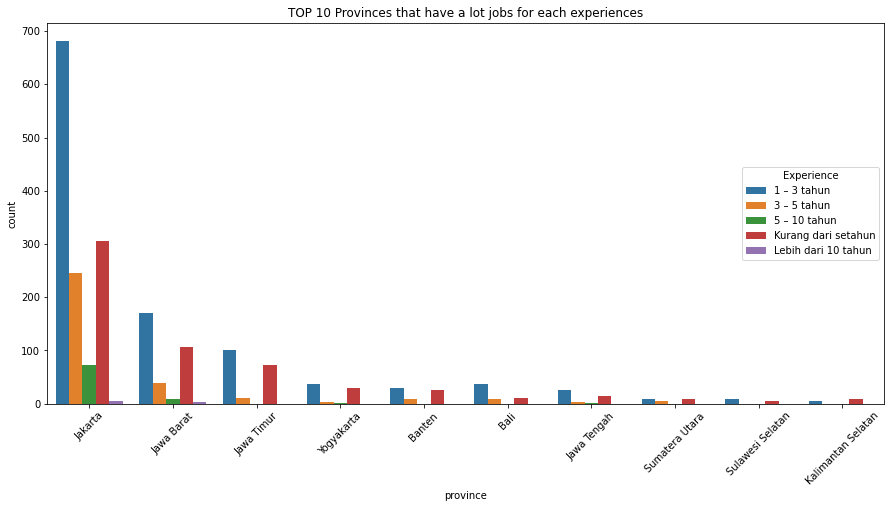

In [112]:
sns.countplot(x='province', hue='exp', data=final_df, order=final_df['province'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.legend(loc='center right', title='Experience')
plt.title('TOP 10 Provinces that have a lot jobs for each experiences')
plt.show()

### 2. TOP 10 Provinces that have the highest average of salary, for each experiences

In [111]:
group1_df = final_df.groupby(['province']).agg(mean=('salary_median', 'mean')).reset_index().sort_values('mean',ascending=False)
group1_df.head()

,province,mean
14,Nusa Tenggara Barat,1.150000e+07
2,Jakarta,8.860960e+06
21,Sumatera Barat,8.125000e+06
0,Bali,7.135212e+06
18,Sulawesi Tengah,7.000000e+06


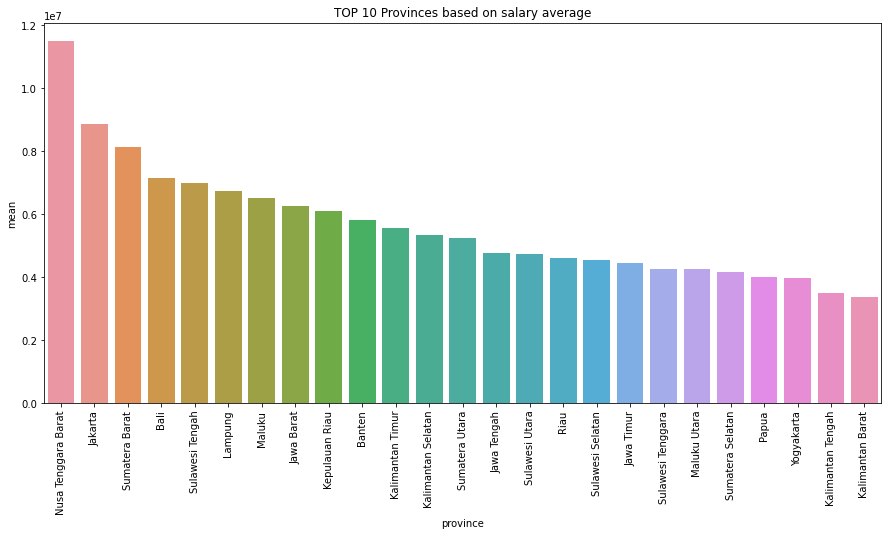

In [113]:
sns.barplot(x='province', y='mean', data=group1_df)
plt.xticks(rotation=90)
plt.title('TOP 10 Provinces based on salary average')
plt.show()